# Python에서의 파일 입출력

* 프로그램 도중에 다른 파일을 불러들이거나, 다른 파일로 결과를 기록하는 것은 흔한 일이다.  

* Python에서도 이를 위한 간편한 방법들을 제공한다.
   * text 파일과 그 외의 파일들을 모두 불러올 수 있다.
   
* 그 외의 여러가지 옵션을 통해, 파일을 읽어 들이는 방식 등을 조정할 수 있다.

### 파일 열기

* Python의 함수인 ```open```을 이용하여 파일을 열 수 있다.  
https://docs.python.org/3/library/functions.html#open
* 다음의 간단한 예제를 체크해 보자.
  * 이 예제의 ex1.csv 파일은 간단한 텍스트 파일로 다음의 내용을 가지고 있다.
  
a,b,c,d,message  
1,2,3,4,hello  
5,6,7,8,world  
9,10,11,12,foo  

In [1]:
a_file = open(file = 'ex1.csv', mode = 'r')

읽은 파일이 텍스트 파일인 경우 ```.readline()``` method를 통해 한 줄씩 차례로 읽을 수 있다.

In [2]:
a_file.readline()

'a,b,c,d,message\n'

In [3]:
a_file.readline()

'1,2,3,4,hello\n'

In [4]:
a_file.readline()

'5,6,7,8,world\n'

In [5]:
a_file.readline()

'9,10,11,12,foo'

In [6]:
# 마지막 라인까지 모두 읽었음
a_file.readline()

''

작업을 마친 후에는 ```.close()``` method를 이용해 종료한다.

In [7]:
a_file.close()

위의 파일 라인별 read 과정은 반복 작업이라는 점에 착안하여 ```for```를 이용할 수 있다.

In [8]:
a_file = open(file = 'ex1.csv', mode = 'r')
for line in a_file.readlines():
    print(line)
a_file.close()

a,b,c,d,message

1,2,3,4,hello

5,6,7,8,world

9,10,11,12,foo


```.read()``` method를 이용해 모든 라인을 한 번에 읽을 수 있다.

In [9]:
a_file = open(file = 'ex1.csv', mode = 'r')
print(a_file.read())

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [10]:
# 작업 종료
a_file.close()

한편, 위의 file 경로에서는 상대 주소를 이용하였다. 즉, 현재 working directory에 존재하는 ex1.csv 파일을 불러온 것이다.  
물론 절대 경로를 이용하여 파일을 불러올 수도 있다. 이때는 해당 파일의 정확한 경로를 모두 ```file``` 인자로 전달하여야 한다.

그림 파일 등 텍스트 파일이 아닌 경우도 불러올 수 있다.

In [11]:
bfin = open(file = "yu_logo.png", mode = 'rb')

불러들인 ```bfin```를 여러 응용 방안에 활용할 수 있겠지만, 이 강의에서는 자세히 다루지는 않는다. 

다음과 같이 종료하여 마무리 하자.

In [12]:
bfin.close()

그림을 jupyter notebook에 보여주기 위한 목적이라면 다른 라이브러리를 이용해야 한다.

여러 방법이 있겠지만 ```matplotlib```를 이용해 본다.

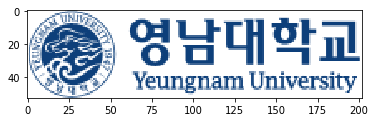

In [13]:
%matplotlib inline    
# 해당 모듈 
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
  
# 그림 읽어들이기
img = mpimg.imread('yu_logo.png') 
  
# 노트북에 출력하기
plt.imshow(img) 

### 파일 작성

* 파일에 텍스트를 작성할 때도 ```open``` 함수를 이용한다.
* 단, 이 경우에는 ```mode``` 인자가 ```w```가 된다.

In [14]:
fout = open("my_test.txt", "w")

fout.write('''
It was the best of times, it was the worst of times,
it was the age of wisdom, it was the age of foolishness,
it was the epoch of belief, it was the epoch of incredulity,
it was the season of Light, it was the season of Darkness,
it was the spring of hope, it was the winter of despair,
we had everything before us, we had nothing before us,
we were all going direct to Heaven, we were all going direct the other way -
in short, the period was so far like the present period,
that some of its noisiest authorities insisted on its being received,
for good or for evil, in the superlative degree of comparison only.

Tale of Two Cities
by Charles Dickens
''')

fout.close()

다시 읽어 파일이 잘 저장되었는지 확인해 보자.

In [15]:
fin = open("my_test.txt", "r")
print(fin.read())
fin.close()


It was the best of times, it was the worst of times,
it was the age of wisdom, it was the age of foolishness,
it was the epoch of belief, it was the epoch of incredulity,
it was the season of Light, it was the season of Darkness,
it was the spring of hope, it was the winter of despair,
we had everything before us, we had nothing before us,
we were all going direct to Heaven, we were all going direct the other way -
in short, the period was so far like the present period,
that some of its noisiest authorities insisted on its being received,
for good or for evil, in the superlative degree of comparison only.

Tale of Two Cities
by Charles Dickens



물론 jupyter notebook의 홈 화면에서 my_test.txt 파일이 생성된 것을 확인할 수 있다.

클릭하여 내용을 확인해 볼 수 있다.

<img src="./figure/my_test.png" width="300">

### ```with```

파일 사용을 마칠 때마다 ```close()```를 취하는 것이 번거롭다면 ```with```구문을 이용할 수 있다.

In [16]:
with open("my_test.txt") as fin:
    print(fin.read())


It was the best of times, it was the worst of times,
it was the age of wisdom, it was the age of foolishness,
it was the epoch of belief, it was the epoch of incredulity,
it was the season of Light, it was the season of Darkness,
it was the spring of hope, it was the winter of despair,
we had everything before us, we had nothing before us,
we were all going direct to Heaven, we were all going direct the other way -
in short, the period was so far like the present period,
that some of its noisiest authorities insisted on its being received,
for good or for evil, in the superlative degree of comparison only.

Tale of Two Cities
by Charles Dickens



위 의 ```with``` 구문에서는 ```with```내의 블록 코드가 종료됨과 동시에, 파일을 자동으로 ```close``` 하여 준다.

따라서 파일 입출력 시에는 ```with``` 구문을 적극적으로 활용하는 것이 편리하다.

#### 예제 : txt 파일을 읽고, 각 라인의 앞에 라인 번호 매기기

In [17]:
def add_nums(filename):
    result = []
    with open(filename) as fin:
        for num, line in enumerate(fin):
            result.append(str(num) + ". " + line)
    return result    

In [18]:
add_nums("my_test.txt")

['0. \n',
 '1. It was the best of times, it was the worst of times,\n',
 '2. it was the age of wisdom, it was the age of foolishness,\n',
 '3. it was the epoch of belief, it was the epoch of incredulity,\n',
 '4. it was the season of Light, it was the season of Darkness,\n',
 '5. it was the spring of hope, it was the winter of despair,\n',
 '6. we had everything before us, we had nothing before us,\n',
 '7. we were all going direct to Heaven, we were all going direct the other way -\n',
 '8. in short, the period was so far like the present period,\n',
 '9. that some of its noisiest authorities insisted on its being received,\n',
 '10. for good or for evil, in the superlative degree of comparison only.\n',
 '11. \n',
 '12. Tale of Two Cities\n',
 '13. by Charles Dickens\n']